<a href="https://colab.research.google.com/github/IsaacHgo/Clasificador-de-Gatos-o-Flores/blob/main/Te_pareces_mas_a_una_Flor_o_un_Gato_(Clasificador).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Librerias
import os
import kagglehub
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import gradio as gr

# Base de datos

In [4]:
# Primero cargamos una base de dtaos de Kaggle
#Tiene bastantes imagenes de algnas cosas como bicicletas, personas y asi
#Pero lo que nos importa es que haremos un clasificador de gatos y flores

path = kagglehub.dataset_download("pavansanagapati/images-dataset")
print("Path to dataset files:", path)

# Listamos las subcarpetas para extraer solo las imagenes que necesitamos
for root, dirs, files in os.walk(path):
    print(f"Found directory: {root}")

100%|██████████| 1.01G/1.01G [00:26<00:00, 41.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/cars
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/data
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/data/cars
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/data/dogs
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/data/human
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/data/horses
Found directory: /root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/version

Directorios respectivos para Flores y gatos

flower1

Catos1

Esto solo es un ejemplo:

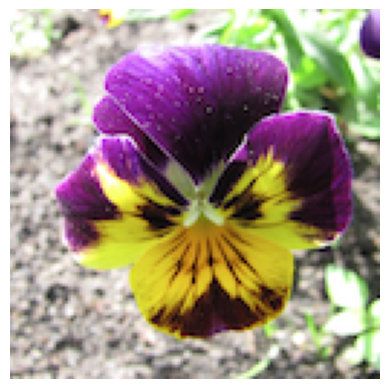

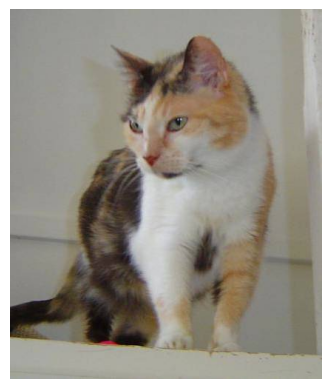

In [13]:
flower1="/root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/flowers"
Catos1="/root/.cache/kagglehub/datasets/pavansanagapati/images-dataset/versions/1/data/cats"
#Esto solo es un ejemplo
path = flower1
# Cargar y mostrar una imagen de ejemplo

image_path = os.path.join(path, "0130.png")
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()

path = Catos1
# Cargar y mostrar una imagen de ejemplo

image_path = os.path.join(path, "cat.130.jpg")
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()

# Transformación de las imagenes

In [15]:


# Rutas de las carpetas (cambia estas rutas por las tuyas)
W_gatos = Catos1
W_flores = flower1
# Función para cargar y preprocesar las imágenes
#El tamañ es mediano para que no sea poca información
Tamano=(64, 64)
def cargar_imagenes(ruta, Clase, Tamano):
    imagenes = []
    GyF = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".jpg") or archivo.endswith(".png"):  # Considera solo archivos de imagen
            #A partir de aqui, la imagen será deformada a nuestro placer como si fueramos los Qu (All Tomorrows)
            imgage = Image.open(os.path.join(ruta, archivo))
            imgage = imgage.convert('L') # Convertir a escala de grises para que mi pc no se queme y se cargen los archivos bien
            imgage = imgage.resize(Tamano)# Redimensionar la imagen a lo definido
            imgageArai = np.array(imgage) # Convertir la imagen a un array
            imgageArai = imgageArai / 255.0 ## Normalizcion de los pixeles
            imagenes.append(imgageArai) # Añadir la imagen y la clasificacion al conjunto de datos
            GyF.append(Clase) #Preferí no usar filtros grandes debido a que la matriz de confusion se iba a la v
    return np.array(imagenes), np.array(GyF)

# Cargar imágenes. 1 es para gatos y 2 para flores
imagenes_gatos, GyF_gatos = cargar_imagenes(W_gatos, Clase=1,
                                            Tamano=Tamano)
imagenes_flores, GyF_flores = cargar_imagenes(W_flores, Clase=0,
                                              Tamano=Tamano)
# Unir alos datos
imagenes = np.concatenate([imagenes_gatos, imagenes_flores], axis=0)
GyF = np.concatenate([GyF_gatos, GyF_flores], axis=0)

Ahora, me da cosa que sean tan pocos datos asi que aplicaré
un consejo visto en clase y crearé mas data en base a la tenida

In [16]:
# Añadir una dimensión extra para representar las imágenes como imágenes en escala de grises (28x28x1)
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
imagenes = np.expand_dims(imagenes, axis=-1)


# Aqui vamos más allá de los Qu y jugamos a ser dioses con las imagenes
datagen = ImageDataGenerator(
    rotation_range=40,      #Rotación aleatoria
    width_shift_range=0.2,  #Desplazamiento horizontal
    height_shift_range=0.2, #Desplazamiento vertical
    shear_range=0.2,        #Corte aleatorio
    horizontal_flip=True,   #Volteo aleatorio
    fill_mode='nearest'     #Rellenar lo vacio tras la deformación
)

# Repetir las imágenes para aumentar el tamaño del dataset
Images_New = []
GyF_New = []

# Aplicar aumentación a las imágenes originales
for i in range(len(imagenes)):
    img = imagenes[i]
    Clase = GyF[i]
    # Redimensionar para usar ImageDataGenerator
    img = np.expand_dims(img, axis=0)
    # Generar las iagenes buenas.
    for _ in range(5):  # Crear 5 versiones aumentadas por imagen original
        for img_aumentada in datagen.flow(img, batch_size=1):
            Images_New.append(img_aumentada[0])
            GyF_New.append(Clase)
            break

#Esto ya se ha hecho
# Convertir arrays
Images_New = np.array(Images_New)
GyF_New = np.array(GyF_New)
# Unir las imágenes nuevas con las otras
imagenes = np.concatenate([imagenes, Images_New], axis=0)
GyF = np.concatenate([GyF, GyF_New], axis=0)

# Revolver los datos. jsjjss Terremoto xd
indices = np.arange(imagenes.shape[0])
np.random.shuffle(indices)

#Ordenar
imagenes = imagenes[indices]
GyF = GyF[indices]


# Dividir en conjunto de entrenamiento y prueba
imagenes_train, imagenes_test, GyF_train, GyF_test = train_test_split(
    imagenes, GyF, test_size=0.2, random_state=42)

# Verifica las dimensiones
print(imagenes_train.shape, GyF_train.shape)
print(imagenes_test.shape, GyF_test.shape)

(1977, 64, 64, 1) (1977,)
(495, 64, 64, 1) (495,)


#Pequeño ejemplo de las imagenes

(64, 64, 1)
0


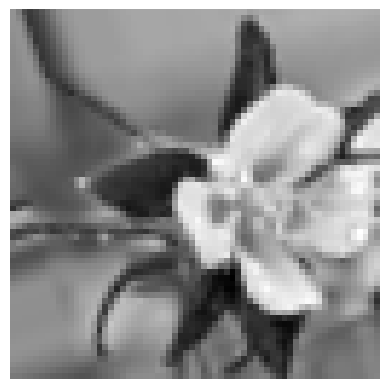

In [17]:
r=random.randint(0, 1977)
plt.imshow(imagenes[r], cmap='gray')  # 'cmap="gray"' para mostrar la imagen en escala de grises
plt.axis('off')  # Opcional: ocultar los ejes
print(imagenes[r].shape)
print(GyF[r])
plt.show()

# Solo corra esto para que la base de datos solo sea el 5%

In [18]:
train_sample_size = int(0.05 * len(imagenes_train))
test_sample_size = int(0.05 * len(imagenes_test))
indices_train = np.random.choice(len(imagenes_train), train_sample_size, replace=False)
indices_test = np.random.choice(len(imagenes_test), test_sample_size, replace=False)
imagenes_train = imagenes_train[indices_train]
GyF_train = GyF_train[indices_train]
imagenes_test = imagenes_test[indices_test]
GyF_test = GyF_test[indices_test]
print(imagenes_train.shape, GyF_train.shape)
print(imagenes_test.shape, GyF_test.shape)

(98, 64, 64, 1) (98,)
(24, 64, 64, 1) (24,)


# Modelo y entrenamiento

In [19]:
# Crear un modelo simple de clasificación
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64
                           , (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 clases: gatos y flores
])

# Compilar el modelo
modelo.compile(optimizer='AdamW', #Este optimizador es el que mejor me ha resultado y pq no quiero un sobre ajuste
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(imagenes_train, GyF_train, epochs=20, validation_data=(imagenes_test, GyF_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.5135 - loss: 0.7138 - val_accuracy: 0.5000 - val_loss: 0.7435
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.5568 - loss: 0.7130 - val_accuracy: 0.5000 - val_loss: 0.6704
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.5839 - loss: 0.6403 - val_accuracy: 0.5000 - val_loss: 0.6398
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.5473 - loss: 0.6214 - val_accuracy: 0.5000 - val_loss: 0.6524
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.5839 - loss: 0.6290 - val_accuracy: 0.5833 - val_loss: 0.5924
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.7383 - loss: 0.5737 - val_accuracy: 0.8750 - val_loss: 0.5728
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - accuracy: 0.7830 - loss: 0.5369 - val_accuracy: 0.5000 - val_loss: 0.6871
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.5689 - loss: 0.6337 - val_accuracy: 0.6667 - val_loss:

#Evaluación

In [20]:
loss, accuracy = modelo.evaluate(imagenes_test, GyF_test)
print(f"Precisión del modelo: {accuracy * 100:.2f}%",  "Bueno... no está mal no?")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9167 - loss: 0.2889
Precisión del modelo: 91.67% Bueno... no está mal no?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


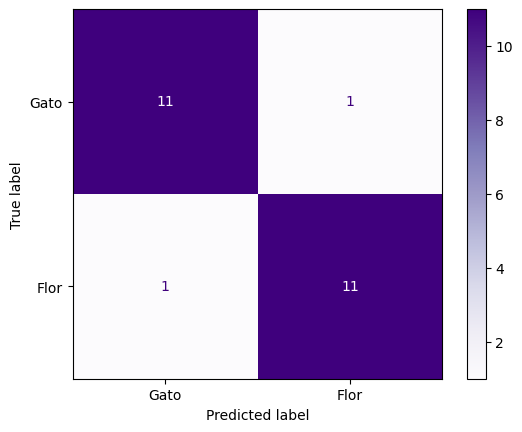

In [21]:
# Mostrar la matriz con GyF
predicciones = modelo.predict(imagenes_test)
clases_predichas = np.argmax(predicciones, axis=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz = confusion_matrix(GyF_test, clases_predichas)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,
                            display_labels=["Gato", "Flor"])  # ajusta si tus GyF están al revés
disp.plot(cmap='Purples')

#Prueba tu imagen (debes de correr el codigo para hacerlo)

In [22]:
def predecir_imagen(imagen):
    img = imagen.convert('L').resize((64, 64))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)  # (128, 128, 1)
    img_array = np.expand_dims(img_array, axis=0)   # (1, 128, 128, 1)
    prediccion = modelo.predict(img_array)
    clase = np.argmax(prediccion)
    return "Creo que esto es un gato 🐱" if clase == 1 else "Creo que esto es una flor 🌸"

# Interfaz drag and drop
theme_morado = gr.themes.Base(
    primary_hue="purple",
    neutral_hue="purple"
)
gr.Interface(fn=predecir_imagen,
             inputs=gr.Image(type="pil", label="Sube una imagen"),
             outputs="text",
             title="¿A que se parece más a un Gato o una Flor?",
             live=False,
             ).launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d78373fde6545ec688.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d78373fde6545ec688.gradio.live
